decision tree classification yöntemi kullandık

In [1]:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

Gerekli modüller

In [2]:
df = pd.read_csv("Stars.csv")
df.head(20)


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.120,Red,M,0
1,3042,0.000500,0.1542,16.600,Red,M,0
2,2600,0.000300,0.1020,18.700,Red,M,0
3,2800,0.000200,0.1600,16.650,Red,M,0
4,1939,0.000138,0.1030,20.060,Red,M,0
5,2840,0.000650,0.1100,16.980,Red,M,0
6,2637,0.000730,0.1270,17.220,Red,M,0
7,2600,0.000400,0.0960,17.400,Red,M,0
8,2650,0.000690,0.1100,17.450,Red,M,0
9,2700,0.000180,0.1300,16.050,Red,M,0


In [3]:

stringcols=["Color","Spectral_Class"]
le2=LabelEncoder()
y = le2.fit_transform(df["Type"])


x=df.drop(['Type'], axis=1)
df[stringcols] = df[stringcols].apply(LabelEncoder().fit_transform)

df.head(20)


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.120,8,5,0
1,3042,0.000500,0.1542,16.600,8,5,0
2,2600,0.000300,0.1020,18.700,8,5,0
3,2800,0.000200,0.1600,16.650,8,5,0
4,1939,0.000138,0.1030,20.060,8,5,0
5,2840,0.000650,0.1100,16.980,8,5,0
6,2637,0.000730,0.1270,17.220,8,5,0
7,2600,0.000400,0.0960,17.400,8,5,0
8,2650,0.000690,0.1100,17.450,8,5,0
9,2700,0.000180,0.1300,16.050,8,5,0


numeric olmayan kolonları (renk ve Spectral_Class) numeric hâle getiriyoruz.

string column to numeric (Color and spectral_class columns)

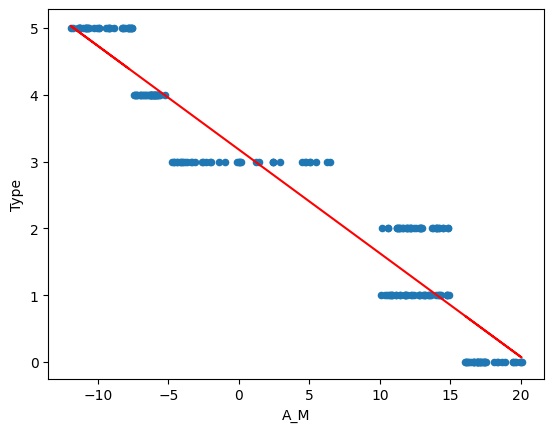

In [4]:
regression_model = linear_model.LinearRegression()

regression_model.fit(X = pd.DataFrame(df["A_M"]), 
                    y = df["Type"])
train_prediction = regression_model.predict(X = pd.DataFrame(df["A_M"]))
df.plot(kind="scatter", x="A_M", y="Type")
plt.plot(df["A_M"], train_prediction, color="red")
plt.show()


Hangi sütunların yıldız tipiyle ilişkisi olduğunu anlamak için linear regression oluşturuyoruz. 
Absolute Magnitude'in yıldızın tipiyle doğrusal alakası var.

In [5]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0


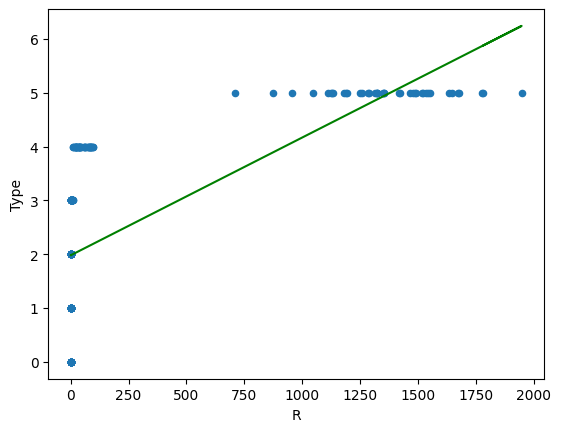

In [6]:
regression_model.fit(X = pd.DataFrame(df["R"]), 
                    y = df["Type"])
train_prediction = regression_model.predict(X = pd.DataFrame(df["R"]))
df.plot(kind="scatter", x="R", y="Type")
plt.plot(df["R"], train_prediction, color="green")
plt.show()


3-4-5 tipindeki yıldızlarda radiusun yıldız tipini etkilediğini görüyoruz

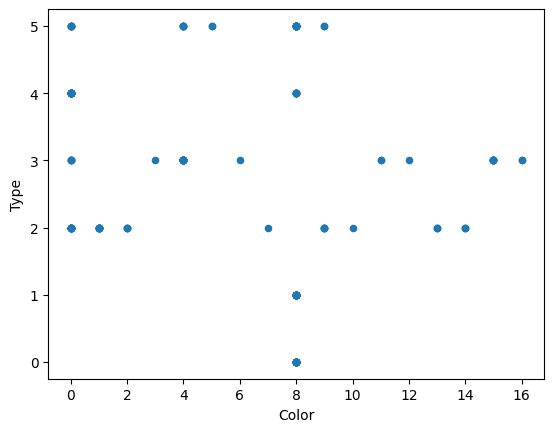

In [7]:
regression_model.fit(X = pd.DataFrame(df["Color"]), 
                    y = df["Type"])
train_prediction = regression_model.predict(X = pd.DataFrame(df["Color"]))
df.plot(kind="scatter", x="Color", y="Type")

plt.show()


yıldızını etkileyen değerlerde yıldızın renginin etkili olmadığını görüyoruz

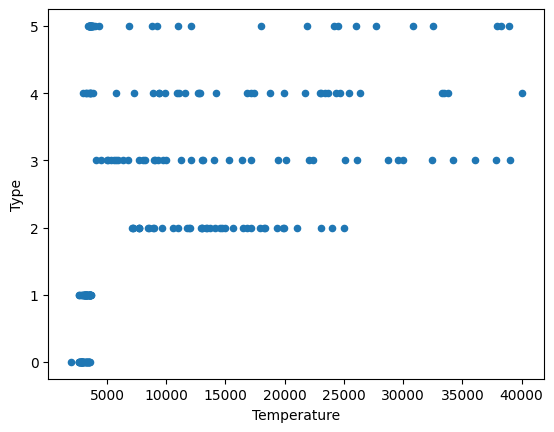

In [8]:
regression_model.fit(X = pd.DataFrame(df["Temperature"]), 
                    y = df["Type"])
train_prediction = regression_model.predict(X = pd.DataFrame(df["Temperature"]))
df.plot(kind="scatter", x="Temperature", y="Type")

plt.show()


sıcaklığın doğrusal olmasa da etkisinin olduğunu görüyoruz

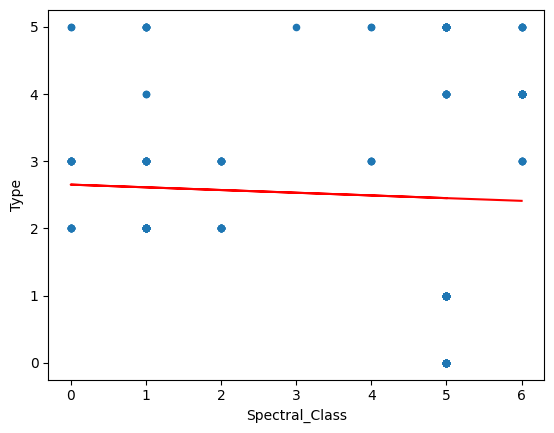

In [9]:
regression_model.fit(X = pd.DataFrame(df["Spectral_Class"]), 
                    y = df["Type"])
train_prediction = regression_model.predict(X = pd.DataFrame(df["Spectral_Class"]))
df.plot(kind="scatter", x="Spectral_Class", y="Type")
plt.plot(df["Spectral_Class"], train_prediction, color="red")
plt.show()

spektral sınıfın yıldız tipinde etkisi olmadığı görünmüyor

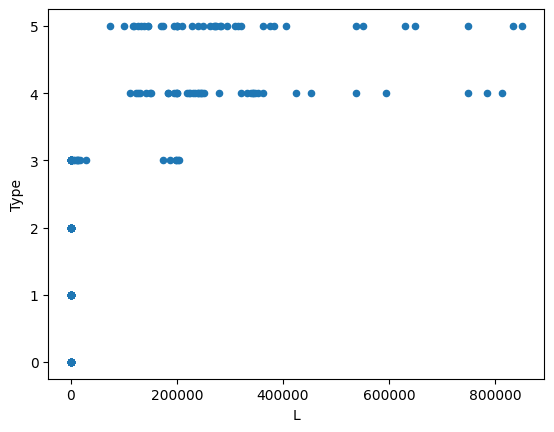

In [10]:
regression_model.fit(X = pd.DataFrame(df["L"]), 
                    y = df["Type"])
train_prediction = regression_model.predict(X = pd.DataFrame(df["L"]))
df.plot(kind="scatter", x="L", y="Type")

plt.show()

bağıl parlaklığın yıldız tipinde etkisi olduğunu görüyoruz

In [160]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)

dataseti %70ini koda öğretmek için %30'unu kodu test etmek için 4 parçaya ayırıyoruz. 

x_test=yıldızın spesifik bilgilerinin olduğu kodun öğreneceği kısım

y_test= x_test listesindeki yıldızların tipleri 

x_train=kodu test etmek için ayırdığımız yıldız bilgileri

y_test=kodu test etmek için ayırdığımız x_train listesinin yıldız tipi (yani predict'lemeye çalıştığımız kısım)

In [161]:
tree=DecisionTreeClassifier(criterion='entropy')
classifier=tree.fit(x_train,y_train)


kod'a datasetimizin %70'ini öğretiyoruz

In [162]:
classifier.score(x_test,y_test)

0.9861111111111112

My code's accuracy rate is 98%

In [163]:
print(list(classifier.predict(x_test)),end='')

[4, 1, 3, 1, 4, 4, 3, 4, 3, 1, 1, 2, 2, 3, 5, 1, 0, 5, 4, 0, 4, 5, 2, 0, 0, 2, 1, 3, 1, 4, 5, 4, 2, 0, 2, 5, 2, 5, 0, 1, 3, 4, 3, 1, 4, 1, 4, 0, 5, 5, 0, 3, 5, 1, 3, 3, 5, 3, 5, 4, 1, 3, 3, 5, 2, 3, 1, 3, 0, 1, 0, 4]

kodun x_test listesindeki tahmin ettiği yıldız tiplerinin listesi

In [164]:
print(list(y_test))

[4, 1, 3, 1, 4, 4, 3, 4, 3, 1, 1, 2, 2, 3, 5, 1, 0, 5, 4, 0, 4, 5, 2, 0, 0, 2, 1, 3, 1, 4, 5, 4, 2, 0, 2, 5, 2, 5, 0, 3, 3, 4, 3, 1, 4, 1, 4, 0, 5, 5, 0, 3, 5, 1, 3, 3, 5, 3, 5, 4, 1, 3, 3, 5, 2, 3, 1, 3, 0, 1, 0, 4]


The actual result of the star types of the data in the x_test list. Almost the same as what the code predicts

[Text(0.5, 0.875, 'x[1] <= 0.104\nentropy = 2.579\nsamples = 168\nvalue = [30, 27, 32, 24, 27, 28]'),
 Text(0.3, 0.625, 'x[0] <= 5396.0\nentropy = 1.581\nsamples = 89\nvalue = [30, 27, 32, 0, 0, 0]'),
 Text(0.2, 0.375, 'x[3] <= 15.495\nentropy = 0.998\nsamples = 57\nvalue = [30, 27, 0, 0, 0, 0]'),
 Text(0.1, 0.125, 'entropy = 0.0\nsamples = 27\nvalue = [0, 27, 0, 0, 0, 0]'),
 Text(0.3, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0, 0, 0, 0, 0]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 32\nvalue = [0, 0, 32, 0, 0, 0]'),
 Text(0.7, 0.625, 'x[3] <= -7.54\nentropy = 1.582\nsamples = 79\nvalue = [0, 0, 0, 24, 27, 28]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 0, 0, 0, 28]'),
 Text(0.8, 0.375, 'x[3] <= -4.97\nentropy = 0.998\nsamples = 51\nvalue = [0, 0, 0, 24, 27, 0]'),
 Text(0.7, 0.125, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 0, 0, 27, 0]'),
 Text(0.9, 0.125, 'entropy = 0.0\nsamples = 24\nvalue = [0, 0, 0, 24, 0, 0]')]

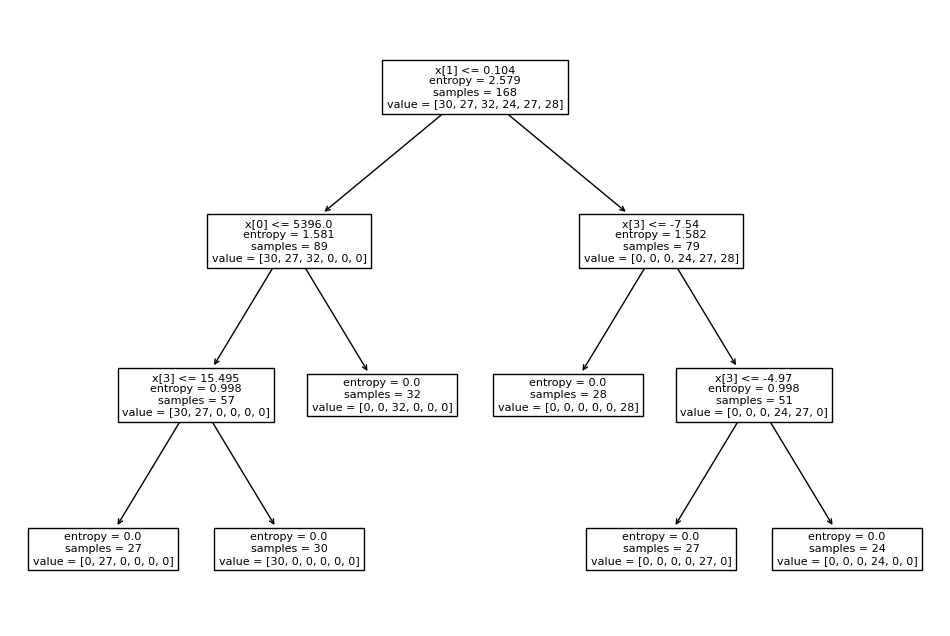

In [165]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(classifier.fit(x_train, y_train)) 

In [166]:
y_pred_en = classifier.predict(x_test)
print(confusion_matrix(y_test, y_pred_en))

[[10  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  1  0 15  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  0  0  0 12]]


In [149]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

